## Song Recommendation Using Text Classification with NLP

### What is in the Ipython Notebook?
+ Dataset Loading
+ Data Preprocessing
+ Model Building

### Load EDA Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
! pip install scikit-learn eli5 lime neattext pandas spacy numpy seaborn altair streamlit

### Load the Text Cleaning Packages

In [4]:
import neattext.functions as nfx

### Load ML Packages and Estimators

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


# Vectorizers/Estimators
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Load the Dataset 

In [6]:
df = pd.read_csv("data/text_emotion.csv")

In [7]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [8]:
df = df.drop(columns = ['tweet_id','author'])

In [9]:
df

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [10]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

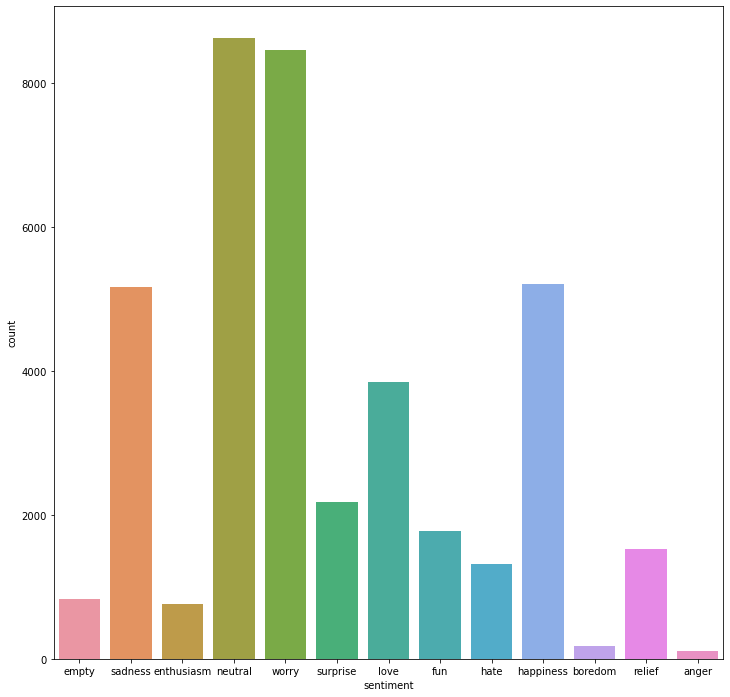

In [9]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x="sentiment", data=df)
plt.show()

### Data Cleaning With NeatText

In [11]:
# Remove User Handles
df['emotion'] = df['sentiment'].apply(nfx.remove_userhandles)

In [12]:
# Remove Stopwords
df['emotion'] = df['sentiment'].apply(nfx.remove_stopwords)

In [13]:
df

,sentiment,content,emotion
0,empty,@tiffanylue i know i was listenin to bad habi...,
1,sadness,Layin n bed with a headache ughhhh...waitin o...,sadness
2,sadness,Funeral ceremony...gloomy friday...,sadness
3,enthusiasm,wants to hang out with friends SOON!,enthusiasm
4,neutral,@dannycastillo We want to trade with someone w...,neutral
...,...,...,...
39995,neutral,@JohnLloydTaylor,neutral
39996,love,Happy Mothers Day All my love,love
39997,love,Happy Mother's Day to all the mommies out ther...,love
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happiness


### Feature Engineering

In [14]:
# Features and Labels
xfeatures = df['content']
ylabels = df['sentiment']

In [15]:
# Split
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size = 0.3, random_state = 10)

In [16]:
# Building Pipeline
from sklearn.pipeline import Pipeline

In [17]:
# Logistic Regression Pipeline
pipe_lr = Pipeline(steps = [('cv',CountVectorizer()),('lr',LogisticRegression())]) # estimator, transformer

In [18]:
# Train and fit data
pipe_lr.fit(x_train,y_train)

C:\Users\Vedanth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [19]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [69]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.33775

In [21]:
# make a prediction
ex1 = "I am depressed. I want to listen to happy songs"

In [22]:
pipe_lr.predict([ex1])

array(['sadness'], dtype=object)

In [23]:
pipe_lr.predict_proba([ex1])

array([[0.00150377, 0.00129991, 0.00682066, 0.01041557, 0.01118189,
        0.15897769, 0.03025362, 0.12245463, 0.0450564 , 0.02152889,
        0.38251859, 0.00932235, 0.19866603]])

In [24]:
pipe_lr.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

### Pickling our model

In [26]:
import joblib
pipeline_file = open("emotion_classifier.pkl",'wb')
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

### Model Evaluation

+ Work in Progress! Feel Free to contribute